In [1]:
import pandas as pd
import numpy as np

df = pd.read_csv('/kaggle/input/ds-data/data_final.csv')
data = pd.read_csv('/kaggle/input/ds-data/data_final.csv')
# df.price = df.price/max(df.price)
df = df.sample(frac=1).reset_index()
df = df.drop(columns=[df.columns[0], df.columns[1]])
for col in df.columns[:8]:
    df[col] = np.log10(df[col])
df


,screen_size,screen_resolution,cpu_speed,ram,memory,weight,price,ppi,brand_acer,brand_apple,...,gpu_description_integrated,OpSys_mac_os,OpSys_windows,color_black,color_blue,color_gold,color_grey,color_other,color_silver,color_white
0,1.193125,6.316725,0.698970,1.505150,3.01030,0.586587,2.948902,2.149872,0,0,...,1,0,1,0,0,0,0,1,0,0
1,1.193125,6.316725,0.477121,1.301030,3.01030,0.622214,2.642465,2.149872,1,0,...,1,0,1,0,0,0,0,0,1,0
2,1.146128,6.612360,0.698970,1.204120,3.01030,0.574031,3.245510,2.333717,1,0,...,0,0,1,0,0,0,0,0,1,0
3,1.238046,6.316725,0.414973,1.079181,2.70927,0.758155,2.812245,2.104950,1,0,...,1,0,1,0,0,0,0,0,1,0
4,1.064458,6.020812,0.041393,0.602060,1.80618,0.322219,2.413300,2.130637,0,0,...,1,0,1,0,0,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2430,1.204120,6.316725,0.556303,1.806180,3.01030,0.741152,3.226855,2.138876,0,0,...,0,0,1,0,0,0,1,0,0,0
2431,1.146128,6.020812,0.255273,1.505150,3.31133,0.510545,2.831870,2.048967,0,0,...,1,0,1,0,1,0,0,0,0,0
2432,1.193125,6.316725,0.531479,0.903090,2.10721,0.547775,2.623239,2.149872,0,0,...,1,0,1,0,0,0,1,0,0,0
2433,1.146128,6.773723,0.607455,1.556303,2.70927,0.698970,3.380030,2.410875,0,1,...,1,1,0,1,0,0,0,0,0,0


/opt/conda/lib/python3.10/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.24.3
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


<Axes: xlabel='price', ylabel='Count'>

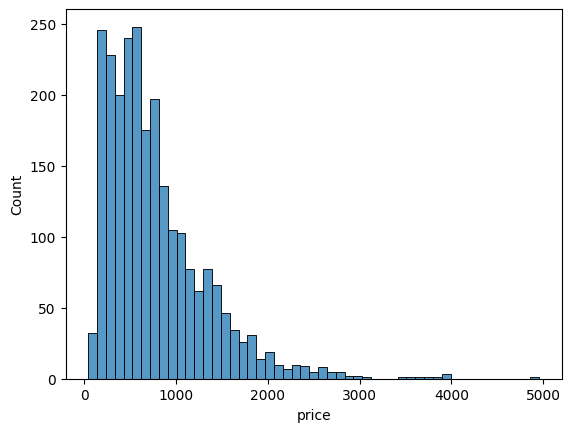

In [2]:
import matplotlib.pyplot as plt
import seaborn as sns
sns.histplot(data.price)

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


<Axes: xlabel='price', ylabel='Count'>

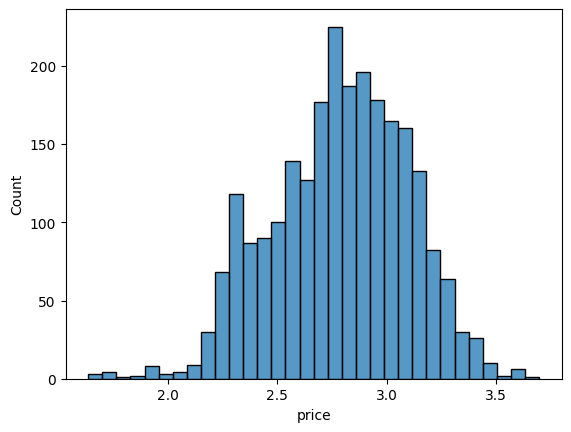

In [3]:
sns.histplot(df.price)

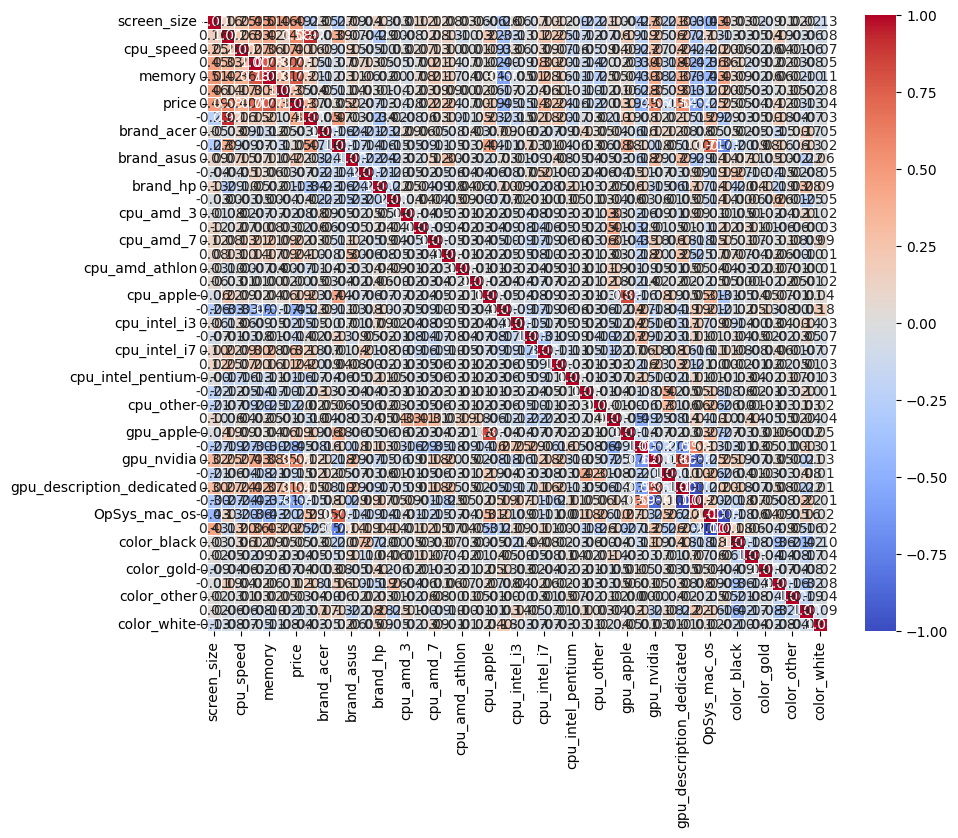

In [4]:
import seaborn as sns
correlation_matrix = df.corr()
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=.5)
plt.show()

In [5]:
correlation_matrix['price']

screen_size                   0.489030
screen_resolution             0.577824
cpu_speed                     0.403700
ram                           0.704643
memory                        0.770250
weight                        0.350688
price                         1.000000
ppi                           0.374558
brand_acer                   -0.030897
brand_apple                   0.052924
brand_asus                    0.218023
brand_dell                   -0.065480
brand_hp                     -0.131120
brand_lenovo                 -0.043337
cpu_amd_3                    -0.078006
cpu_amd_5                     0.015869
cpu_amd_7                     0.218397
cpu_amd_9                     0.235447
cpu_amd_athlon               -0.073022
cpu_amd_r_series              0.001696
cpu_apple                     0.192545
cpu_intel_celeron            -0.450159
cpu_intel_i3                 -0.145204
cpu_intel_i5                 -0.136862
cpu_intel_i7                  0.320927
cpu_intel_i9             

# Tune Cell

In [6]:
pred_col = ['price']

In [7]:
feature_col = [] # Columns feature for training
for col in df.columns:
    if not col in pred_col:
        feature_col.append(col)
feature_col

['screen_size',
 'screen_resolution',
 'cpu_speed',
 'ram',
 'memory',
 'weight',
 'ppi',
 'brand_acer',
 'brand_apple',
 'brand_asus',
 'brand_dell',
 'brand_hp',
 'brand_lenovo',
 'cpu_amd_3',
 'cpu_amd_5',
 'cpu_amd_7',
 'cpu_amd_9',
 'cpu_amd_athlon',
 'cpu_amd_r_series',
 'cpu_apple',
 'cpu_intel_celeron',
 'cpu_intel_i3',
 'cpu_intel_i5',
 'cpu_intel_i7',
 'cpu_intel_i9',
 'cpu_intel_pentium',
 'cpu_mediatek_mt8183',
 'cpu_other',
 'gpu_amd',
 'gpu_apple',
 'gpu_intel',
 'gpu_nvidia',
 'gpu_other',
 'gpu_description_dedicated',
 'gpu_description_integrated',
 'OpSys_mac_os',
 'OpSys_windows',
 'color_black',
 'color_blue',
 'color_gold',
 'color_grey',
 'color_other',
 'color_silver',
 'color_white']

In [8]:
train_test_split = int(len(df)*0.8)
df_train = df[:train_test_split]
df_test = df[train_test_split:]
df_train.shape, df_test.shape

((1948, 45), (487, 45))

In [9]:
y_train = df_train[pred_col].to_numpy()
X_train = df_train[feature_col].to_numpy()
X_train.shape, y_train.shape

((1948, 44), (1948, 1))

In [10]:
y_test = df_test[pred_col].to_numpy()
X_test = df_test[feature_col].to_numpy()
X_test.shape, y_test.shape

((487, 44), (487, 1))

# Tuning Cell

In [11]:
K_fold = 5 # K fold for cross validation, K fold = Train set 
lamda = 1 # Ridge parameter
neighbors = 1 # Num neighbors of KNN
rf_depth = 25 # Random Forest depth
dt_depth = 25 # Decision Tree depth
hidden_layer_size = 1800 # MLP hidden layer size

# Ridge without cross valid

In [12]:
from sklearn.linear_model import Ridge
ridge = Ridge(alpha=lamda)
ridge.fit(X_train, y_train)
ridge.score(X_train, y_train)

0.8203436363964777

In [13]:
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
y_pred = ridge.predict(X_test)
print('R2 Score: ', r2_score(y_test,y_pred))
print('Mean Absolute Error (MAE): ', mean_absolute_error(y_test,y_pred))
print(f'Mean Squared Error (MSE): ', mean_squared_error(y_test,y_pred))
print( f'Root Mean Squared Error (RMSE): ', mean_squared_error(y_test,y_pred, squared=False))

R2 Score:  0.8067781615494143
Mean Absolute Error (MAE):  0.09862655470779223
Mean Squared Error (MSE):  0.01757081587800609
Root Mean Squared Error (RMSE):  0.1325549541812983


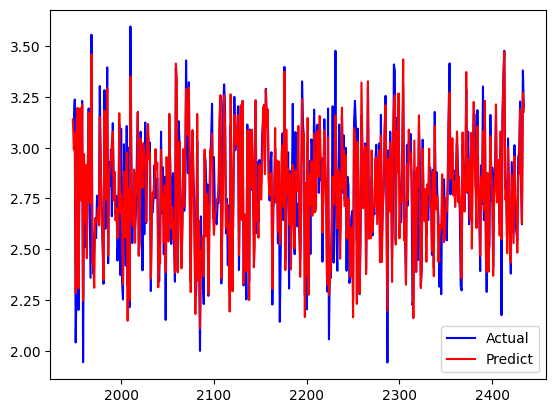

In [14]:
plt.plot(df_test.index, y_test, color="blue", label = 'Actual')
plt.plot(df_test.index, y_pred, color="red", label = 'Predict')

# plt.xticks(())
# plt.yticks(())
plt.legend()
plt.show()

# KNN

In [15]:
from sklearn.neighbors import KNeighborsRegressor
knn = KNeighborsRegressor(n_neighbors=neighbors)
knn.fit(X_train, y_train)
knn.score(X_train, y_train)

0.9980569319576681

In [16]:
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
y_pred = knn.predict(X_test)
print('R2 Score: ', r2_score(y_test,y_pred))
print('Mean Absolute Error (MAE): ', mean_absolute_error(y_test,y_pred))
print(f'Mean Squared Error (MSE): ', mean_squared_error(y_test,y_pred))
print( f'Root Mean Squared Error (RMSE): ', mean_squared_error(y_test,y_pred, squared=False))

R2 Score:  0.7401187807683869
Mean Absolute Error (MAE):  0.10160496293641955
Mean Squared Error (MSE):  0.023632551526716773
Root Mean Squared Error (RMSE):  0.1537288246449467


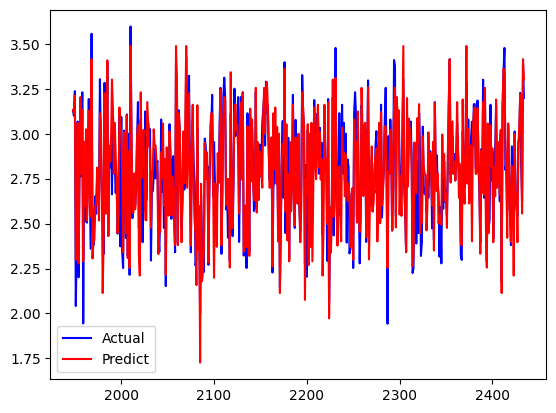

In [17]:
plt.plot(df_test.index, y_test, color="blue", label = 'Actual')
plt.plot(df_test.index, y_pred, color="red", label = 'Predict')

# plt.xticks(())
# plt.yticks(())
plt.legend()
plt.show()

# Decision Tree

In [18]:
from sklearn.tree import DecisionTreeRegressor
dtree = DecisionTreeRegressor(max_depth=dt_depth)
dtree.fit(X_train, y_train)

DecisionTreeRegressor(max_depth=25)

In [19]:
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
y_pred = dtree.predict(X_test)
print('R2 Score: ', r2_score(y_test,y_pred))
print('Mean Absolute Error (MAE): ', mean_absolute_error(y_test,y_pred))
print(f'Mean Squared Error (MSE): ', mean_squared_error(y_test,y_pred))
print( f'Root Mean Squared Error (RMSE): ', mean_squared_error(y_test,y_pred, squared=False))

R2 Score:  0.7677577114987593
Mean Absolute Error (MAE):  0.09673238987193361
Mean Squared Error (MSE):  0.0211191784689786
Root Mean Squared Error (RMSE):  0.14532439048204746


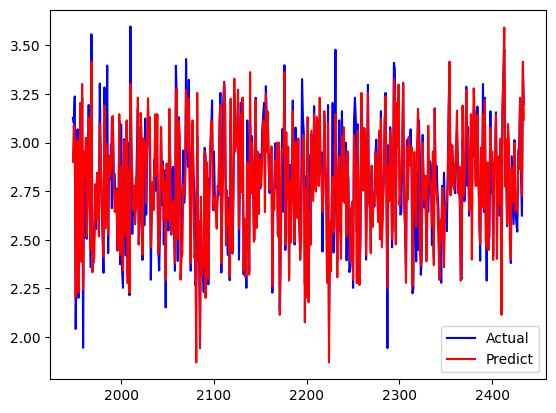

In [20]:
plt.plot(df_test.index, y_test, color="blue", label = 'Actual')
plt.plot(df_test.index, y_pred, color="red", label = 'Predict')

# plt.xticks(())
# plt.yticks(())
plt.legend()
plt.show()

# Random Forest

In [21]:
from sklearn.ensemble import RandomForestRegressor
rf = RandomForestRegressor(max_depth=rf_depth)
rf.fit(X_train, y_train)

/tmp/ipykernel_42/1841216025.py:3: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rf.fit(X_train, y_train)


RandomForestRegressor(max_depth=25)

In [22]:
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
y_pred = rf.predict(X_test)
print('R2 Score: ', r2_score(y_test,y_pred))
print('Mean Absolute Error (MAE): ', mean_absolute_error(y_test,y_pred))
print(f'Mean Squared Error (MSE): ', mean_squared_error(y_test,y_pred))
print( f'Root Mean Squared Error (RMSE): ', mean_squared_error(y_test,y_pred, squared=False))

R2 Score:  0.855108016381086
Mean Absolute Error (MAE):  0.08008539706758976
Mean Squared Error (MSE):  0.013175893505526752
Root Mean Squared Error (RMSE):  0.11478629493770914


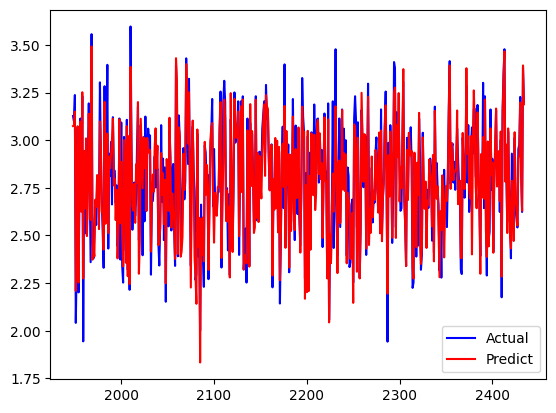

In [23]:
plt.plot(df_test.index, y_test, color="blue", label = 'Actual')
plt.plot(df_test.index, y_pred, color="red", label = 'Predict')

# plt.xticks(())
# plt.yticks(())
plt.legend()
plt.show()

# MLP

In [24]:
from sklearn.neural_network import MLPRegressor

mlp = MLPRegressor(hidden_layer_sizes=(hidden_layer_size, hidden_layer_size), activation='relu', max_iter=500, random_state=42, learning_rate='adaptive')
mlp.fit(X_train, y_train)
mlp.score(X_train, y_train)

/opt/conda/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:1623: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


0.8657810992566085

In [25]:
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
y_pred = mlp.predict(X_test)
print('R2 Score: ', r2_score(y_test,y_pred))
print('Mean Absolute Error (MAE): ', mean_absolute_error(y_test,y_pred))
print(f'Mean Squared Error (MSE): ', mean_squared_error(y_test,y_pred))
print( f'Root Mean Squared Error (RMSE): ', mean_squared_error(y_test,y_pred, squared=False))

R2 Score:  0.7931526577733086
Mean Absolute Error (MAE):  0.10049283789741968
Mean Squared Error (MSE):  0.018809864321053884
Root Mean Squared Error (RMSE):  0.13714905876838485


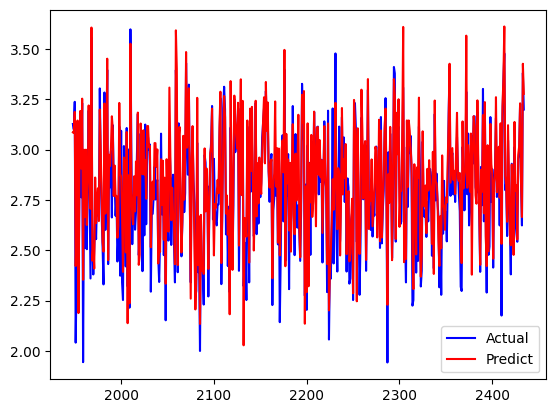

In [26]:
plt.plot(df_test.index, y_test, color="blue", label = 'Actual')
plt.plot(df_test.index, y_pred, color="red", label = 'Predict')

# plt.xticks(())
# plt.yticks(())
plt.legend()
plt.show()

# Ensemble Model

In [27]:
from sklearn.ensemble import StackingRegressor

ensemble_model = StackingRegressor(
    estimators=[('ridge', ridge), ('knn', knn), ('dtree', dtree), ('rf', rf), ('mlp', mlp)]
)

# Fit the ensemble model to the training data
ensemble_model.fit(X_train, y_train)

ensemble_model.score(X_train, y_train)

/opt/conda/lib/python3.10/site-packages/sklearn/ensemble/_stacking.py:957: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


0.9535182236514326

In [28]:
y_pred = ensemble_model.predict(X_test)
print('R2 Score: ', r2_score(y_test,y_pred))
print('Mean Absolute Error (MAE): ', mean_absolute_error(y_test,y_pred))
print(f'Mean Squared Error (MSE): ', mean_squared_error(y_test,y_pred))
print( f'Root Mean Squared Error (RMSE): ', mean_squared_error(y_test,y_pred, squared=False))

R2 Score:  0.8597094420911147
Mean Absolute Error (MAE):  0.07924720801150073
Mean Squared Error (MSE):  0.012757458381549224
Root Mean Squared Error (RMSE):  0.11294891934653126


# Cross Validation

In [29]:
y = df[pred_col].to_numpy()
X = df[feature_col].to_numpy()

In [30]:
def cross_val_score(model, X, y, cv=K_fold):
    mae = []
    mse = []
    r2 = []
    rmse = []
    for i in range(1, cv+1):
        from_idx = int(len(X)*(i-1)/cv)
        to_idx = int(len(X)*i/cv)
        X_test = X[from_idx:to_idx]
        X_train = np.concatenate((X[:from_idx], X[to_idx:]))
        y_test = y[from_idx:to_idx]
        y_train = np.concatenate((y[:from_idx], y[to_idx:]))
        model.fit(X_train, y_train)
        y_pred = model.predict(X_test)
        r2.append(r2_score(y_test, y_pred))
        mae.append(mean_absolute_error(y_test,y_pred))
        mse.append(mean_squared_error(y_test,y_pred))
        rmse.append(mean_squared_error(y_test,y_pred, squared=False))
    return [sum(r2)/len(r2), sum(mae)/len(mae), sum(mse)/len(mse), sum(rmse)/len(rmse)]
        

In [31]:
ridge_loss = cross_val_score(ridge, X, y, cv=K_fold)
knn_loss = cross_val_score(knn, X, y, cv=K_fold)
dtree_loss = cross_val_score(dtree, X, y, cv=K_fold)
rf_loss = cross_val_score(rf, X, y, cv=K_fold)
mlp_loss = cross_val_score(mlp, X, y, cv=K_fold)
ensemble_loss = cross_val_score(ensemble_model, X, y, cv=K_fold)

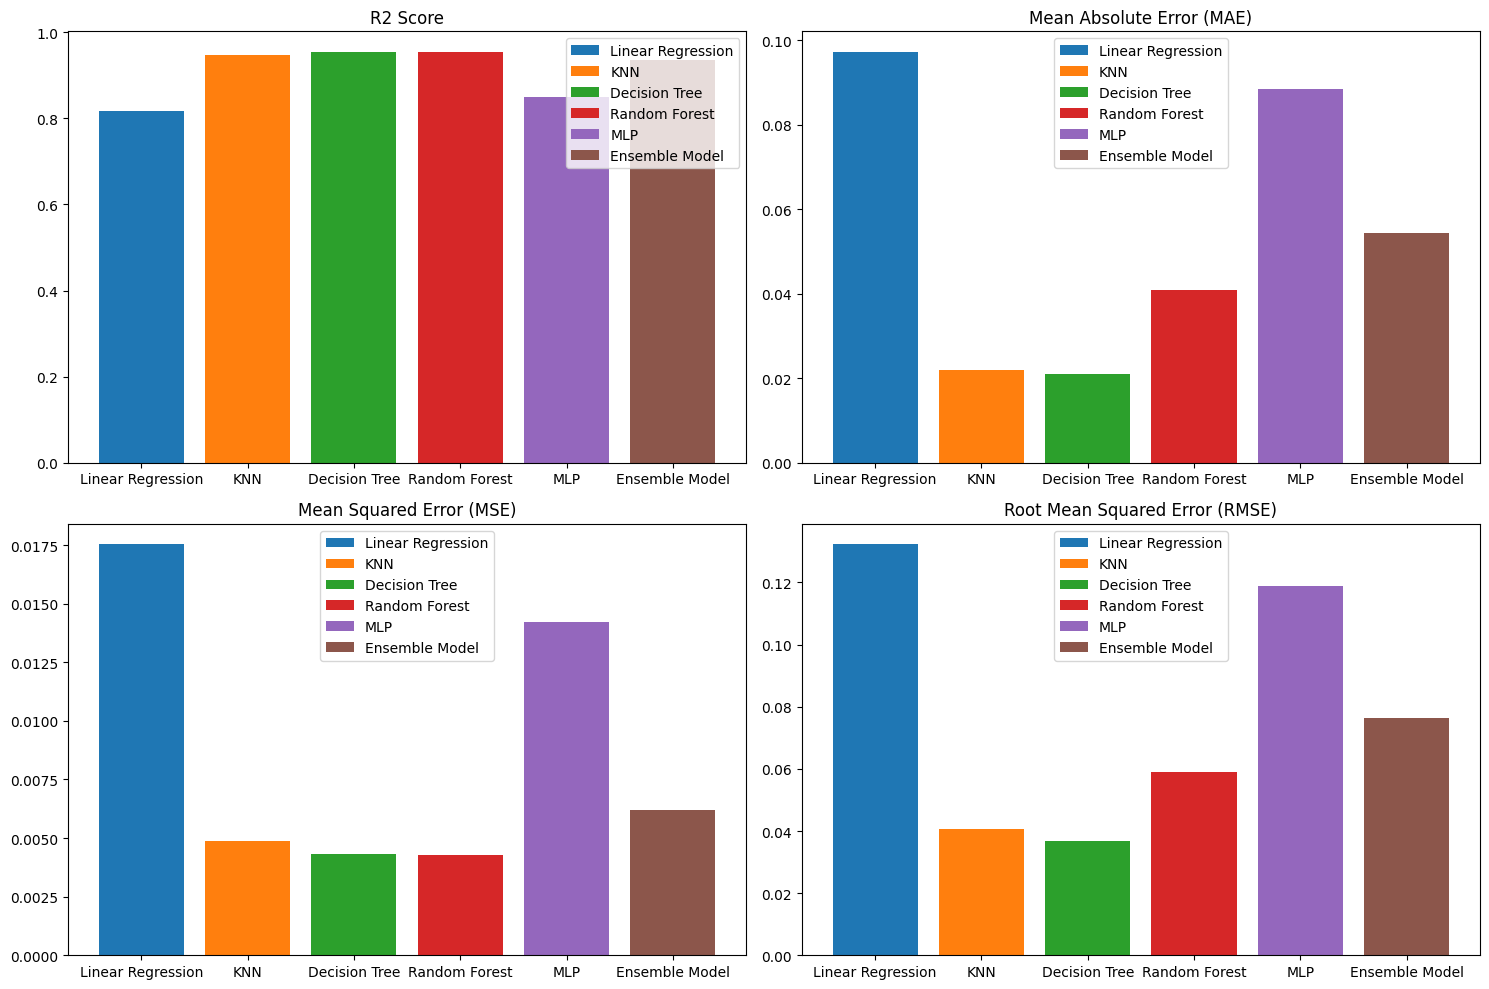

In [32]:
import numpy as np
import matplotlib.pyplot as plt

metrics = ['R2 Score', 'Mean Absolute Error (MAE)', 'Mean Squared Error (MSE)', 'Root Mean Squared Error (RMSE)']

N = len(metrics)
models = ['Linear Regression', 'KNN', 'Decision Tree', 'Random Forest', 'MLP', 'Ensemble Model']

fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(15, 10))

for i in range(N):
    row, col = divmod(i, 2)
    bars = np.array([ridge_loss[i], knn_loss[i], dtree_loss[i], rf_loss[i], mlp_loss[i], ensemble_loss[i]])
    for j, model in enumerate(models):
        axes[row, col].bar(model, bars[j], label=model)

    axes[row, col].set_title(metrics[i])
    axes[row, col].legend()

plt.tight_layout()
plt.show()


In [289]:
np.round(ridge_loss,3)

array([0.816, 0.098, 0.018, 0.132])

In [290]:
np.round(knn_loss,3)

array([0.943, 0.023, 0.006, 0.044])

In [291]:
np.round(dtree_loss,3)

array([0.944, 0.024, 0.005, 0.04 ])

In [292]:
np.round(rf_loss,3)

array([0.954, 0.041, 0.004, 0.06 ])

In [293]:
np.round(mlp_loss,3)

array([0.89 , 0.07 , 0.011, 0.102])

In [294]:
np.round(ensemble_loss,3)

array([0.945, 0.048, 0.005, 0.069])

Tuning Ridge Model

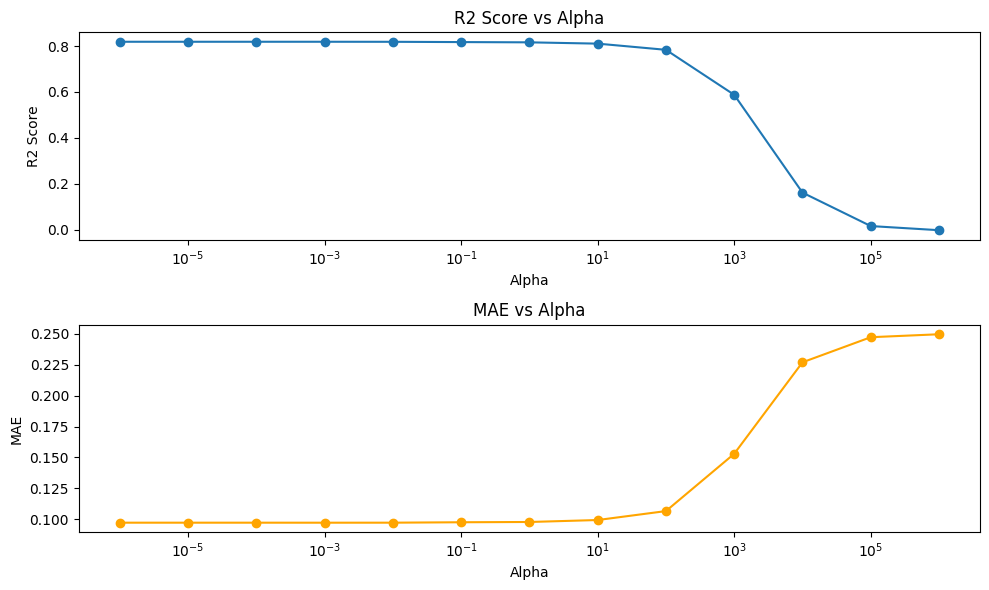

In [231]:
alphas = np.logspace(-6, 6, 13)

# Lists to store results
r2_scores = []
mae_scores = []

# Loop through alpha values and train Ridge Regression models
for alpha in alphas:
    ridge = Ridge(alpha=alpha)
    ridge.fit(X_train, y_train)
    
    # Make predictions on the test set
    y_pred = ridge.predict(X_test)
    
    # Calculate R2 score and MAE
    r2 = cross_val_score(ridge, X, y, cv=K_fold)[0]
    mae = cross_val_score(ridge, X, y, cv=K_fold)[1]
    
    r2_scores.append(r2)
    mae_scores.append(mae)

# Plot the results
plt.figure(figsize=(10, 6))

plt.subplot(2, 1, 1)
plt.plot(alphas, r2_scores, marker='o')
plt.xscale('log')
plt.xlabel('Alpha')
plt.ylabel('R2 Score')
plt.title('R2 Score vs Alpha')

plt.subplot(2, 1, 2)
plt.plot(alphas, mae_scores, marker='o', color='orange')
plt.xscale('log')
plt.xlabel('Alpha')
plt.ylabel('MAE')
plt.title('MAE vs Alpha')

plt.tight_layout()
plt.show()

KNN

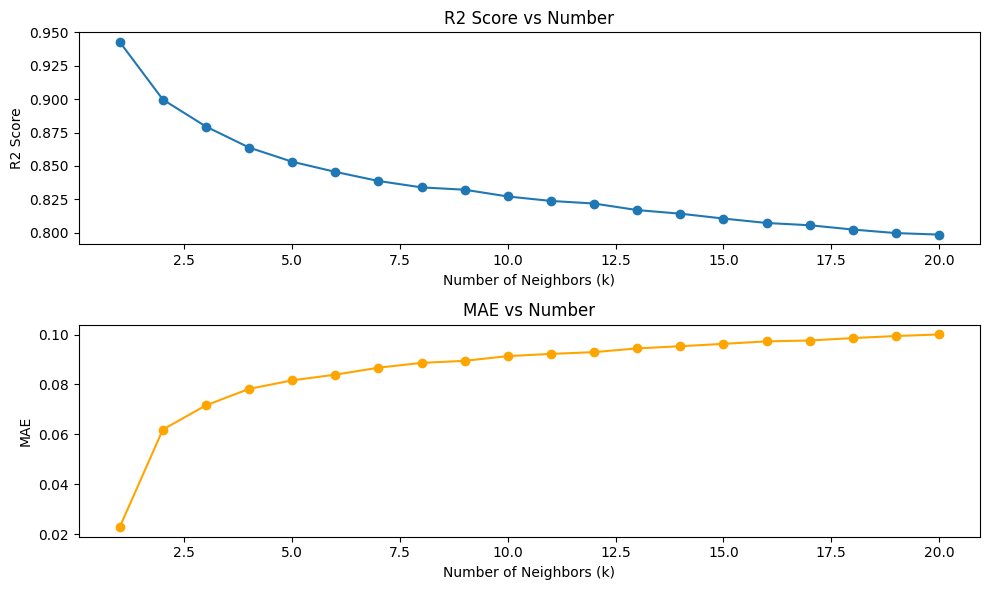

In [232]:
neighbors = np.arange(1, 21)

# Lists to store results
r2_scores = []
mae_scores = []

# Loop through the number of neighbors and train KNN models
for n in neighbors:
    knn = KNeighborsRegressor(n_neighbors=n)
    knn.fit(X_train, y_train)
    
    # Make predictions on the test set
    y_pred = knn.predict(X_test)
    
    # Calculate R2 score and MAE
    r2 = cross_val_score(knn, X, y, cv=K_fold)[0]
    mae = cross_val_score(knn, X, y, cv=K_fold)[1]
    
    r2_scores.append(r2)
    mae_scores.append(mae)

# Plot the results
plt.figure(figsize=(10, 6))

plt.subplot(2, 1, 1)
plt.plot(neighbors, r2_scores, marker='o')
plt.xlabel('Number of Neighbors (k)')
plt.ylabel('R2 Score')
plt.title('R2 Score vs Number')

plt.subplot(2, 1, 2)
plt.plot(neighbors, mae_scores, marker='o', color='orange')
plt.xlabel('Number of Neighbors (k)')
plt.ylabel('MAE')
plt.title('MAE vs Number')

plt.tight_layout()
plt.show()

Decision Tree

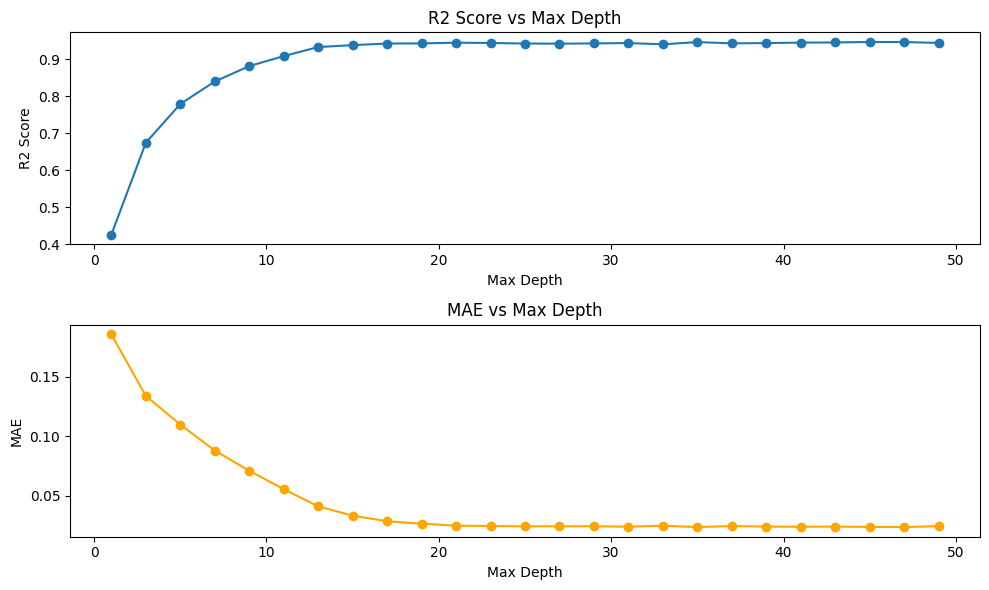

In [233]:
max_depths = np.arange(1, 51, 2)

# Lists to store results
r2_scores = []
mae_scores = []

# Loop through max depths and train Decision Tree models
for depth in max_depths:
    dtree = DecisionTreeRegressor(max_depth=depth)
    dtree.fit(X_train, y_train)
    
    # Make predictions on the test set
    y_pred = dtree.predict(X_test)
    
    # Calculate R2 score and MAE
    r2 = cross_val_score(dtree, X, y, cv=K_fold)[0]
    mae = cross_val_score(dtree, X, y, cv=K_fold)[1]
    
    r2_scores.append(r2)
    mae_scores.append(mae)

# Plot the results
plt.figure(figsize=(10, 6))

plt.subplot(2, 1, 1)
plt.plot(max_depths, r2_scores, marker='o')
plt.xlabel('Max Depth')
plt.ylabel('R2 Score')
plt.title('R2 Score vs Max Depth')

plt.subplot(2, 1, 2)
plt.plot(max_depths, mae_scores, marker='o', color='orange')
plt.xlabel('Max Depth')
plt.ylabel('MAE')
plt.title('MAE vs Max Depth')

plt.tight_layout()
plt.show()

Random Forest

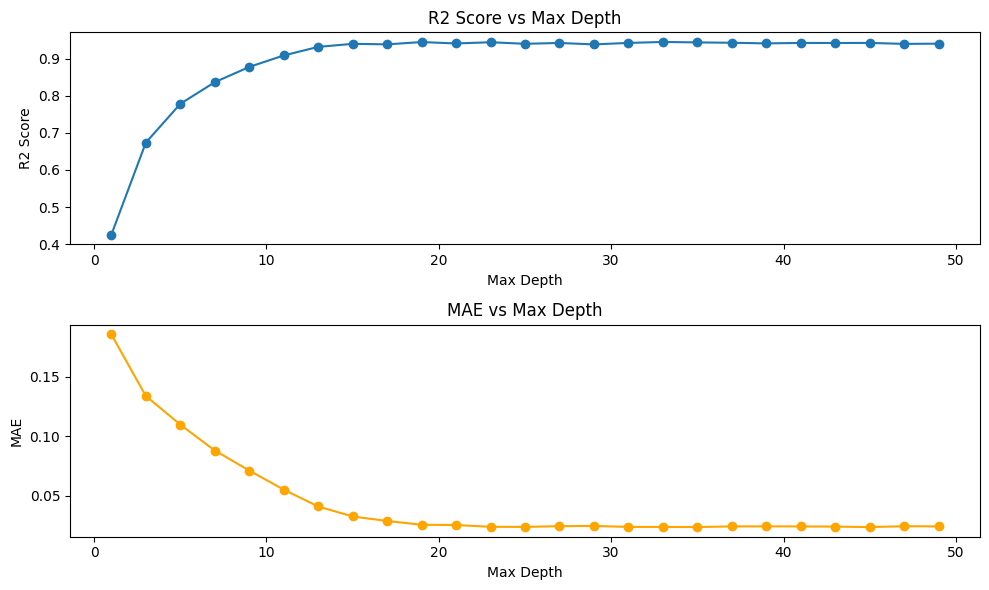

In [234]:
max_depths = np.arange(1, 51, 2)

# Lists to store results
r2_scores = []
mae_scores = []

# Loop through max depths and train Decision Tree models
for depth in max_depths:
    rf = DecisionTreeRegressor(max_depth=depth)
    rf.fit(X_train, y_train)
    
    # Make predictions on the test set
    y_pred = rf.predict(X_test)
    
    # Calculate R2 score and MAE
    r2 = cross_val_score(rf, X, y, cv=K_fold)[0]
    mae = cross_val_score(rf, X, y, cv=K_fold)[1]
    
    r2_scores.append(r2)
    mae_scores.append(mae)

# Plot the results
plt.figure(figsize=(10, 6))

plt.subplot(2, 1, 1)
plt.plot(max_depths, r2_scores, marker='o')
plt.xlabel('Max Depth')
plt.ylabel('R2 Score')
plt.title('R2 Score vs Max Depth')

plt.subplot(2, 1, 2)
plt.plot(max_depths, mae_scores, marker='o', color='orange')
plt.xlabel('Max Depth')
plt.ylabel('MAE')
plt.title('MAE vs Max Depth')

plt.tight_layout()
plt.show()

MLP

/opt/conda/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:1623: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/opt/conda/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:1623: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/opt/conda/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:1623: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/opt/conda/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:1623: DataConversionWarning: A column-vector y was passed w

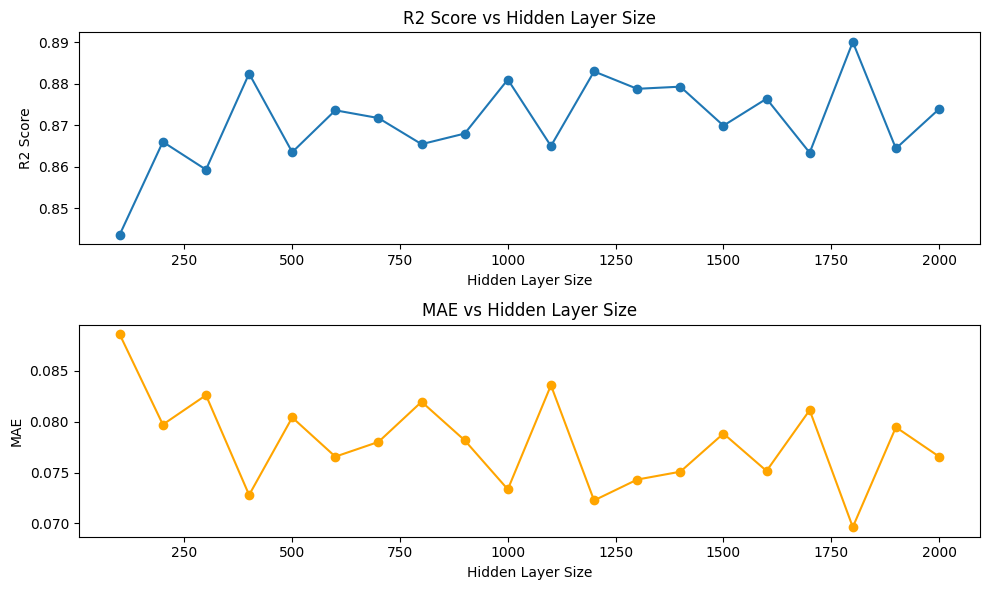

In [266]:
hidden_layer_sizes_values = range(100, 2100, 100)

# Lists to store results
r2_scores = []
mae_scores = []

# Loop through max depths and train Decision Tree models
for n in hidden_layer_sizes_values:
    mlp = MLPRegressor(hidden_layer_sizes=(n, n), activation='relu', max_iter=500, random_state=42, learning_rate='adaptive')
    mlp.fit(X_train, y_train)
    
    # Make predictions on the test set
    y_pred = mlp.predict(X_test)
    
    # Calculate R2 score and MAE
    r2 = cross_val_score(mlp, X, y, cv=K_fold)[0]
    mae = cross_val_score(mlp, X, y, cv=K_fold)[1]
    
    r2_scores.append(r2)
    mae_scores.append(mae)

# Plot the results
plt.figure(figsize=(10, 6))

plt.subplot(2, 1, 1)
plt.plot(hidden_layer_sizes_values, r2_scores, marker='o')
plt.xlabel('Hidden Layer Size')
plt.ylabel('R2 Score')
plt.title('R2 Score vs Hidden Layer Size')

plt.subplot(2, 1, 2)
plt.plot(hidden_layer_sizes_values, mae_scores, marker='o', color='orange')
plt.xlabel('Hidden Layer Size')
plt.ylabel('MAE')
plt.title('MAE vs Hidden Layer Size')

plt.tight_layout()
plt.show()